In [1]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#загружаем данные
df_start = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df_start['InvoiceDate'] = pd.to_datetime(df_start['InvoiceDate']).dt.strftime("%m-%Y") # сразу оставляем только месяц и год в InvoiceDate

In [3]:
df_start.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-2010,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-2010,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-2010,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-2010,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-2010,1.69,13047.0,United Kingdom


In [4]:
df_start.info()
#есть пропуски тошлько в Description и CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df_start.describe()
#Quantity, UnitPrice принимают как положительные, так и отрицательные значения 
#(отрицательные - предположительно возвраты, нужно прининять решение будут ли эти значения участвовать в расчетах),
#минимум и максимум очень сильно отличается от квантилей, необходимо проверить на выбросы

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
#создадим список товаров и посчитаем количество
Code = df_start.StockCode.unique().tolist()
len(Code)

4070

In [7]:
#можно предположить, что коды содержащие пять цифр принадлежат товарам, остальные сопутствующим расходам
#исключаем из списка коды в которых содержится число из 5 цифр

regex = re.compile(r'\d{5}')
filtered_code = [i for i in Code if not regex.match(i)]
print(filtered_code)

['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK']


In [8]:
#Смотрим информацию только по этим позициям

df_1 = df_start[df_start['StockCode'].isin(filtered_code)]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2995 entries, 45 to 541768
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2995 non-null   object 
 1   StockCode    2995 non-null   object 
 2   Description  2980 non-null   object 
 3   Quantity     2995 non-null   int64  
 4   InvoiceDate  2995 non-null   object 
 5   UnitPrice    2995 non-null   float64
 6   CustomerID   1920 non-null   float64
 7   Country      2995 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 210.6+ KB


In [9]:
#смотрим описание и количество по каждой сомнительной позиции
df_sc = df_1.groupby(['StockCode','Description'])['Quantity'].count().reset_index()
df_sc

,StockCode,Description,Quantity
0,AMAZONFEE,AMAZON FEE,34
1,B,Adjust bad debt,3
2,BANK CHARGES,Bank Charges,37
3,C2,CARRIAGE,143
4,CRUK,CRUK Commission,16
5,D,Discount,77
6,DCGS0003,BOXED GLASS ASHTRAY,4
7,DCGS0003,ebay,1
8,DCGS0004,HAYNES CAMPER SHOULDER BAG,1
9,DCGS0067,ebay,1


Видим, что в основном мы верно нашли данные, не имеющие отношения к товару, все что связано с доставкой, комиссиями, образцы, инструкции и подарочные сертификаты, но есть и несколько позиций товаров, их код начинается с 'DCGS', исключим из списка данные артикулы  

отдельно нужно рассмотреть строки с описанием 'ebay'

In [10]:
#удаляем из списка для фильтрации товары

regex2 = re.compile(r'DCGS')
filtered_code_2 = [i for i in filtered_code if not regex2.match(i)]
print(filtered_code_2)

['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'gift_0001_40', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'gift_0001_10', 'PADS', 'B', 'CRUK']


In [11]:
#удаляем лишние данные
df_2 = df_start.loc[~df_start['StockCode'].isin(filtered_code_2)]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538959 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538959 non-null  object 
 1   StockCode    538959 non-null  object 
 2   Description  537513 non-null  object 
 3   Quantity     538959 non-null  int64  
 4   InvoiceDate  538959 non-null  object 
 5   UnitPrice    538959 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538959 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [12]:
#смотрим что содержат строки с описанием 'ebay'
df_ebay = df_start.loc[df_start['Description'] == 'ebay']
df_ebay
#все имеют нулевую стоимость, поэтому так же удаляем

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279251,561249,DCGS0073,ebay,-4,07-2011,0.0,NaN,United Kingdom
279254,561252,DCGS0069,ebay,-5,07-2011,0.0,NaN,United Kingdom
279255,561253,DCGS0068,ebay,-10,07-2011,0.0,NaN,United Kingdom
279256,561254,DCGS0067,ebay,-11,07-2011,0.0,NaN,United Kingdom
279258,561256,DCGS0003,ebay,-7,07-2011,0.0,NaN,United Kingdom


In [13]:
df_2 = df_2.loc[df_2['Description'] != 'ebay']
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538954 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538954 non-null  object 
 1   StockCode    538954 non-null  object 
 2   Description  537508 non-null  object 
 3   Quantity     538954 non-null  int64  
 4   InvoiceDate  538954 non-null  object 
 5   UnitPrice    538954 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538954 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


Разделим датафрейм на 2: df_positive - имеет только положительное количество товара
df_negative - только отрицательное

Судя по описанию отрицательных значений, возвраты товаров имеют тот же номер заказа, что и продажа сдобавление символа 'С' в начале, остальные отрицательные позиции подразумевают списание 
Удалим все отрицательные значения из датафрейма, кроме возврата (или отмены заказа?) товаров покупателями



In [14]:
df_positive = df_2.loc[df_2['Quantity'] > 0]
df_negative = df_2.loc[df_2['Quantity'] < 0]

In [15]:
negative_code = df_negative.InvoiceNo.unique()
len(negative_code) 

4753

In [16]:
regex_negative = re.compile(r'C\d{6}')
filtered_code_negative = [i for i in negative_code if not regex_negative.match(i)]
len(filtered_code_negative)

1331

In [17]:
df_negative = df_negative.loc[~df_negative['InvoiceNo'].isin(filtered_code_negative)]
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 154 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8704 non-null   object 
 1   StockCode    8704 non-null   object 
 2   Description  8704 non-null   object 
 3   Quantity     8704 non-null   int64  
 4   InvoiceDate  8704 non-null   object 
 5   UnitPrice    8704 non-null   float64
 6   CustomerID   8539 non-null   float64
 7   Country      8704 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 612.0+ KB


Обединим данные обратно, таким образом мы избавились от различных списаний и отрицательное значение имеют только возвраты товаров

In [18]:
df = pd.concat([df_positive, df_negative], keys=['x','y'],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537623 entries, 0 to 537622
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    537623 non-null  object 
 1   StockCode    537623 non-null  object 
 2   Description  537039 non-null  object 
 3   Quantity     537623 non-null  int64  
 4   InvoiceDate  537623 non-null  object 
 5   UnitPrice    537623 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      537623 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [19]:
#проверим, есть ли еще товары с нулевой стоимостью
df_0 = df.loc[df['UnitPrice'] == 0]
df_0.info()
#есть и довольно много, так же мы видим, что сюда попали почти все строки без описания и они составляют больше половины всех строк с нулевой стоимостью
# а данные о покупателе всегзхо у 33 строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 611 to 525612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1161 non-null   object 
 1   StockCode    1161 non-null   object 
 2   Description  577 non-null    object 
 3   Quantity     1161 non-null   int64  
 4   InvoiceDate  1161 non-null   object 
 5   UnitPrice    1161 non-null   float64
 6   CustomerID   33 non-null     float64
 7   Country      1161 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 81.6+ KB


In [20]:
# т.к. эти данные являются малоинформативными принимаем решение удалить строки с нулевой стоимотью товара
df.UnitPrice = df.UnitPrice.replace(0, np.nan)
df.dropna(subset = ['UnitPrice'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536462 entries, 0 to 537622
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536462 non-null  object 
 1   StockCode    536462 non-null  object 
 2   Description  536462 non-null  object 
 3   Quantity     536462 non-null  int64  
 4   InvoiceDate  536462 non-null  object 
 5   UnitPrice    536462 non-null  float64
 6   CustomerID   404876 non-null  float64
 7   Country      536462 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [21]:
#проверим, есть ли позици с нулевым количеством
df.loc[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536462.000000,536462.000000,404876.000000
mean,9.888995,3.284067,15295.253282
std,215.961050,4.497167,1710.404209
min,-80995.000000,0.030000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,649.500000,18287.000000


In [23]:
df_start.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Посчитаем сумму по каждой транзакции, добавим стобец SumInvoice

In [24]:
df['SumInvoice'] = df['Quantity']*df['UnitPrice']

In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
537618,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12-2011,1.95,14397.0,United Kingdom,-23.40
537619,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-2011,0.83,14397.0,United Kingdom,-9.13
537620,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-2011,10.95,15311.0,United Kingdom,-54.75
537621,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-2011,1.25,17315.0,United Kingdom,-1.25


Построим графики продаж по количеству и проданых единиц и по сумме чека

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [27]:
df_month = df.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()
df_month

,Quantity,SumInvoice
InvoiceDate,,
01-2011,307640,580406.89
02-2011,280642,500510.33
03-2011,372771,680582.31
04-2011,294912,482901.21
05-2011,391333,732244.18
06-2011,381611,724991.03
07-2011,395410,677955.20
08-2011,409783,702583.98
09-2011,562863,1013430.68


<AxesSubplot:title={'center':'Динамика продаж в единицах'}, xlabel='Год', ylabel='Продажи, ед.'>

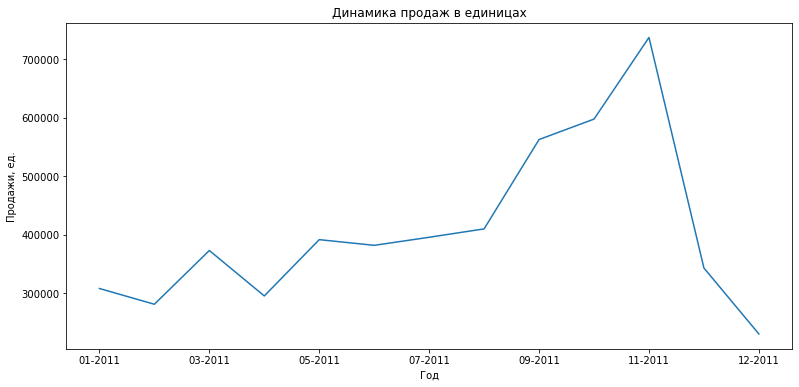

In [28]:
df_month['Quantity'].plot(title='Динамика продаж в единицах', 
                                        xlabel='Год', 
                                        ylabel='Продажи, ед.')

<AxesSubplot:title={'center':'Динамика продаж по сумме'}, xlabel='Год', ylabel='Продажи, у.е.'>

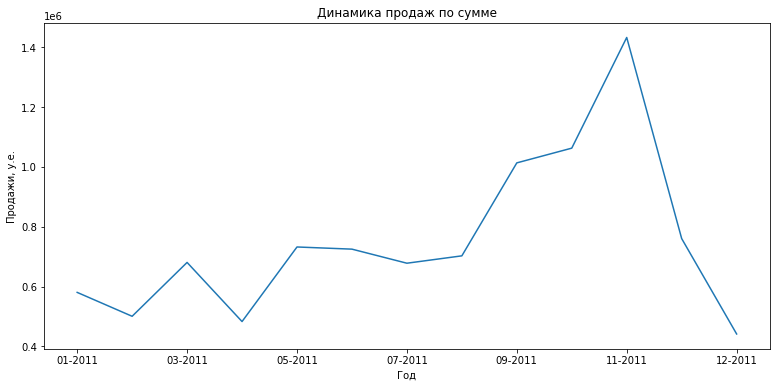

In [29]:
df_month['SumInvoice'].plot(title='Динамика продаж по сумме', 
                                        xlabel='Год', 
                                        ylabel='Продажи, у.е.')

In [30]:
df_UK = df.loc[df['Country'] == 'United Kingdom']
df_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
537618,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12-2011,1.95,14397.0,United Kingdom,-23.40
537619,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-2011,0.83,14397.0,United Kingdom,-9.13
537620,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-2011,10.95,15311.0,United Kingdom,-54.75
537621,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-2011,1.25,17315.0,United Kingdom,-1.25


<AxesSubplot:title={'center':'Динамика продаж в единицах только Великобритания'}, xlabel='Год', ylabel='Продажи, ед.'>

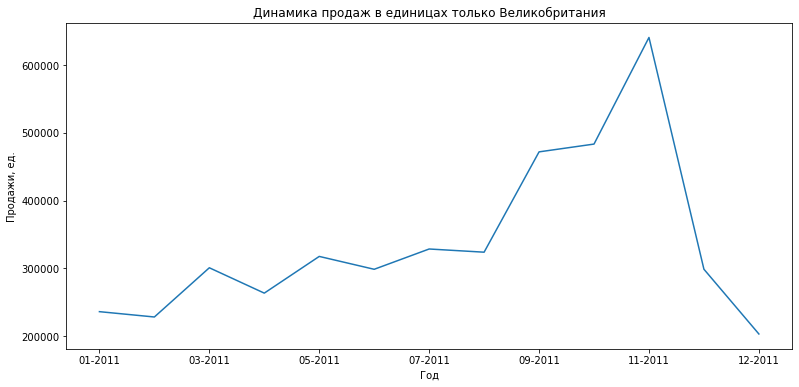

In [31]:
df_month_UK = df_UK.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()
df_month_UK['Quantity'].plot(title='Динамика продаж в единицах только Великобритания', 
                                        xlabel='Год', 
                                        ylabel='Продажи, ед.')

<AxesSubplot:title={'center':'Динамика продаж по сумме'}, xlabel='Год', ylabel='Продажи, у.е.'>

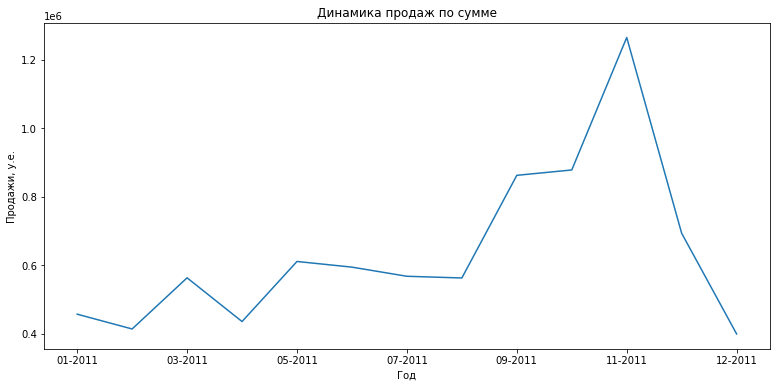

In [32]:
df_month_UK['SumInvoice'].plot(title='Динамика продаж по сумме', 
                                        xlabel='Год', 
                                        ylabel='Продажи, у.е.')

<AxesSubplot:title={'center':'Динамика продаж в единицах другие страны'}, xlabel='Год', ylabel='Продажи, ед.'>

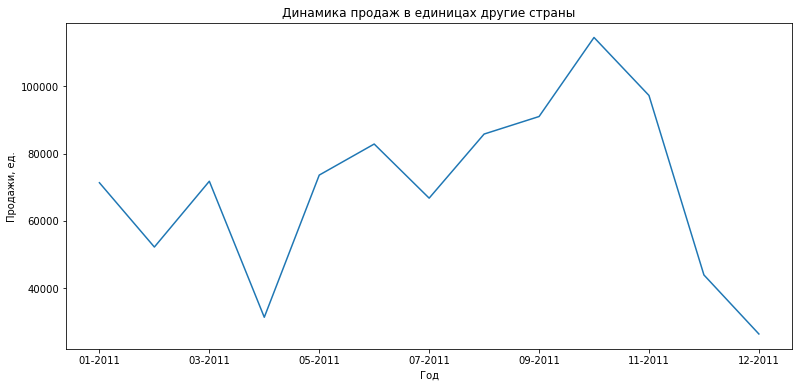

In [33]:
df_other_country = df.loc[df['Country'] != 'United Kingdom']
df_month_other_country = df_other_country.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()
df_month_other_country['Quantity'].plot(title='Динамика продаж в единицах другие страны', 
                                        xlabel='Год', 
                                        ylabel='Продажи, ед.')

<AxesSubplot:title={'center':'Динамика суммы продаж другие страны'}, xlabel='Год', ylabel='Продажи, в у.е.'>

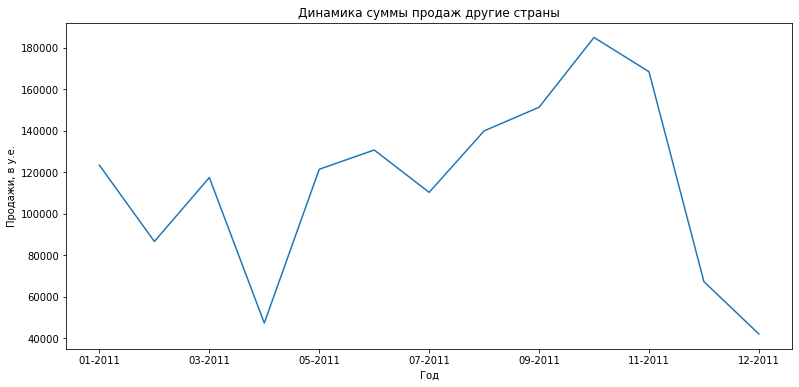

In [34]:
df_month_other_country['SumInvoice'].plot(title='Динамика суммы продаж другие страны', 
                                        xlabel='Год', 
                                        ylabel='Продажи, в у.е.')

Найдем ТОП-5 стран по сумме продаж и по количеству проданных единиц товара 

In [35]:
df_top5_Sales = df_other_country.loc[:, ['SumInvoice', 'Country']].groupby('Country').sum().sort_values('SumInvoice', ascending=False).reset_index()
df_top5_Sales = df_top5_Sales.iloc[:5]
df_top5_Sales

,Country,SumInvoice
0,Netherlands,283479.54
1,EIRE,259663.46
2,Germany,200808.40
3,France,182163.39
4,Australia,136990.00


In [36]:
df_top5_Quantity = df_other_country.loc[:, ['Quantity', 'Country']].groupby('Country').sum().sort_values('Quantity', ascending=False).reset_index()
df_top5_Quantity = df_top5_Quantity.iloc[:5]
df_top5_Quantity

,Country,Quantity
0,Netherlands,199934
1,EIRE,142262
2,Germany,116341
3,France,109690
4,Australia,83345


In [37]:
#выведем список самых прибыльных стран 
#(если в топ5 по сумме и по количеству выйдут разные страны, то имеет смысл рассматривать все из них, как наиболее перспективные 
#а так же дополнительно рассмотреть вопрос почему большее кличество продаж дает меньшую выручки и наоборот)

df_top5 = pd.merge(df_top5_Sales, df_top5_Quantity, how='outer')
top5 = df_top5.Country.unique()
print(top5)

['Netherlands' 'EIRE' 'Germany' 'France' 'Australia']


In [38]:
#оставим данные только по топ5
df_other_country_top5 = df_other_country[df_other_country['Country'].isin(top5)]
df_month_other_country_top5 = df_other_country.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()

In [39]:
df_other_country_count = df_other_country_top5.pivot_table(index = 'InvoiceDate', columns = 'Country', values = 'Quantity', aggfunc = 'sum', fill_value = 0)
df_other_country_count

Country,Australia,EIRE,France,Germany,Netherlands
InvoiceDate,,,,,
01-2011,5644,8685,9071,8818,20416
02-2011,8659,5324,5257,4043,16351
03-2011,10329,9552,8589,7590,14814
04-2011,116,4129,2199,5631,1762
05-2011,8993,7997,9700,12856,19920
06-2011,15973,12325,9364,7286,19725
07-2011,5185,22089,5617,8920,9
08-2011,12570,7653,7888,9473,29012
09-2011,4043,22904,12828,10944,17302


<AxesSubplot:xlabel='Country', ylabel='InvoiceDate'>

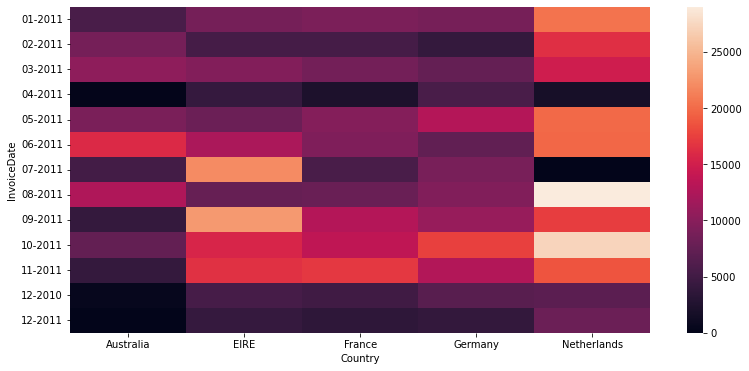

In [40]:
sns.heatmap(df_other_country_count)

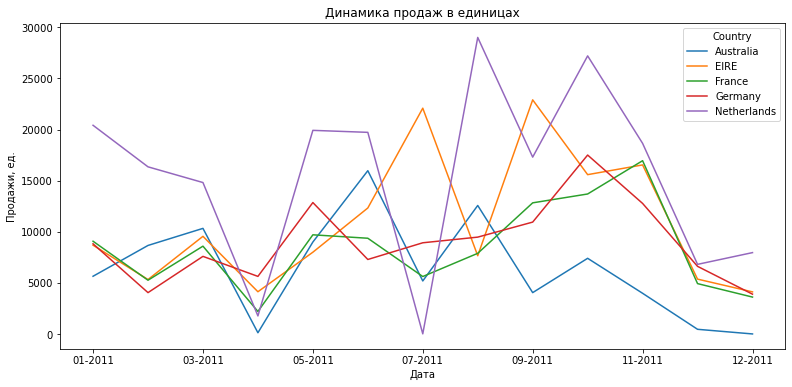

In [41]:
# топ-5 стран по обьему продаж в единицах

ax = df_other_country_count.plot(title='Динамика продаж в единицах', 
                             xlabel='Дата', 
                             ylabel='Продажи, ед.')

In [42]:
df_other_country_sum = df_other_country_top5.pivot_table(index = 'InvoiceDate', columns = 'Country', values = 'SumInvoice', aggfunc = 'sum', fill_value = 0)
df_other_country_sum

Country,Australia,EIRE,France,Germany,Netherlands
InvoiceDate,,,,,
01-2011,9017.71,21506.52,15991.07,14867.43,26596.16
02-2011,14627.47,9509.14,7646.91,8249.24,22797.11
03-2011,17055.29,18283.23,13616.90,12640.02,22206.49
04-2011,-16.60,7270.50,3766.21,10865.37,2886.56
05-2011,13628.51,17671.35,16123.08,23356.35,28942.88
06-2011,25164.77,19600.25,14605.87,11965.02,26738.09
07-2011,4767.57,42240.65,9059.99,14415.31,11.02
08-2011,22489.20,13413.16,12609.26,17457.65,39967.81
09-2011,5031.73,42045.00,21686.87,16208.31,26832.26


<AxesSubplot:xlabel='Country', ylabel='InvoiceDate'>

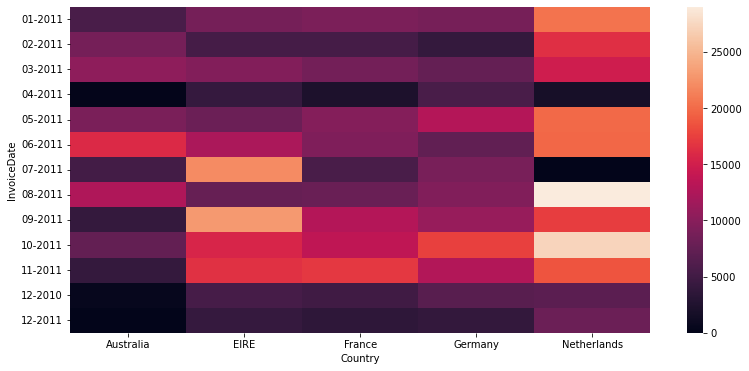

In [43]:
sns.heatmap(df_other_country_count)

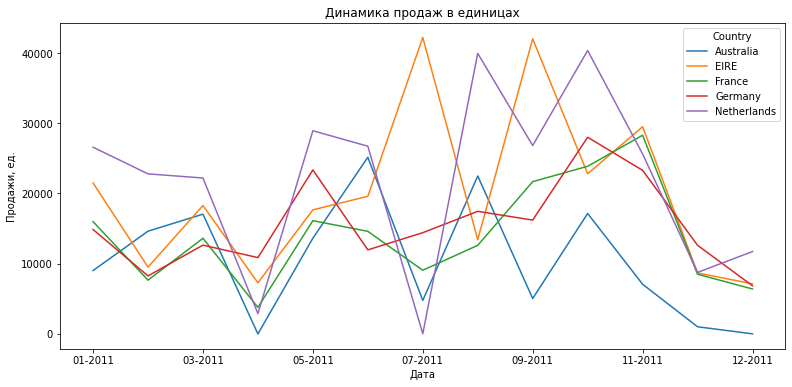

In [44]:
# топ-5 стран по сумме продаж 

ax = df_other_country_sum.plot(title='Динамика продаж в единицах', 
                             xlabel='Дата', 
                             ylabel='Продажи, ед.')

<AxesSubplot:title={'center':'Динамика продаж по сумме'}, xlabel='Год', ylabel='Продажи, у.е.'>

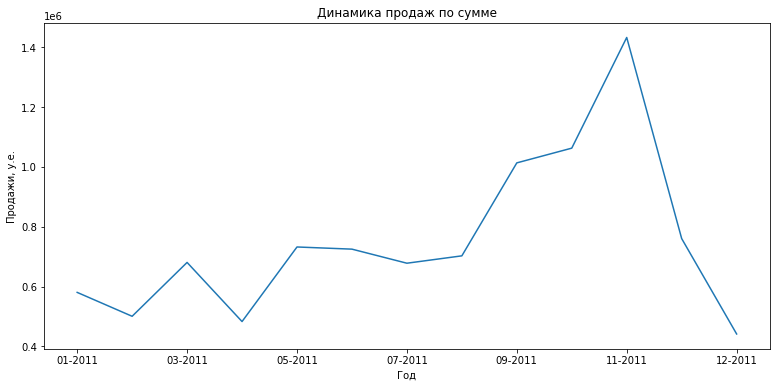

In [45]:
df_month['SumInvoice'].plot(title='Динамика продаж по сумме', 
                                        xlabel='Год', 
                                        ylabel='Продажи, у.е.')

In [64]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'SumInvoice']

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Разделим условно товар на три категории  
1 -  Дешевые товары до стоимостью 0,01- 0,99  
2 - Товары средней категории стоимостью 1,00 - 9,99  
3 - Дорогие товары стоимостью свыше 10.00  

In [58]:
def f(row):
    if row['UnitPrice'] < 1:
        val = 1
    elif row['UnitPrice'] >= 10:
        val = 3
    else:
        val = 2
    return val

In [63]:
df['Category'] = df.apply(f, axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumInvoice,Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom,20.34,2
...,...,...,...,...,...,...,...,...,...,...
537618,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12-2011,1.95,14397.0,United Kingdom,-23.40,2
537619,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-2011,0.83,14397.0,United Kingdom,-9.13,1
537620,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-2011,10.95,15311.0,United Kingdom,-54.75,3
537621,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-2011,1.25,17315.0,United Kingdom,-1.25,2


In [60]:
df_category = df.groupby('Category').sum()
df_category

,Quantity,UnitPrice,CustomerID,SumInvoice
Category,,,,
1,2073010,70045.10,1.437411e+09,1083627.98
2,3176250,1329756.62,4.601137e+09,7878781.34
3,55810,361975.46,1.541333e+08,830299.56


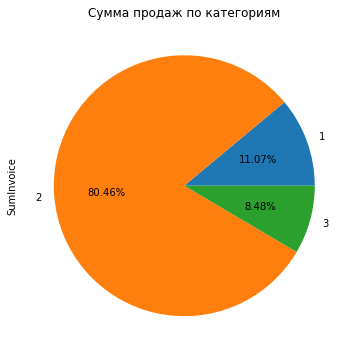

In [69]:
#посмотрим, как распределены доли суммы продаж по категориям
ax = df_category.SumInvoice.plot(kind='pie',
                   title='Сумма продаж по категориям', autopct='%1.2f%%')

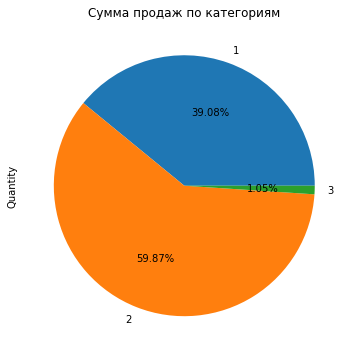

In [68]:
#посмотрим, как распределены доли обьемов продаж в единицах продаж по категориям
ax = df_category.Quantity.plot(kind='pie',
                   title='Сумма продаж по категориям', autopct='%1.2f%%')

In [47]:
df_cost = df.loc[df['UnitPrice'].count() ]
df_ebay = df_start.loc[df_start['Description'] == 'ebay']
df_cost

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,SumInvoice
UnitPrice,,,,,,,,
0.03,1,1,1,1,1,1,1,1
0.04,66,66,66,66,66,66,66,66
0.06,116,116,116,116,116,112,116,116
0.07,9,9,9,9,9,9,9,9
0.08,46,46,46,46,46,46,46,46
...,...,...,...,...,...,...,...,...
175.00,2,2,2,2,2,2,2,2
195.00,12,12,12,12,12,12,12,12
265.50,1,1,1,1,1,1,1,1


In [67]:
#суммарные покупки каждого пользователя

df_customer_sum = df.groupby('CustomerID').sum()
df_customer_sum.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4362 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    4362 non-null   int64  
 1   UnitPrice   4362 non-null   float64
 2   SumInvoice  4362 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 136.3 KB


In [68]:
df_customer_sum.head(30)

,Quantity,UnitPrice,SumInvoice
CustomerID,,,
12346.0,0,2.08,0.00
12347.0,2458,481.21,4310.00
12348.0,2332,18.71,1437.24
12349.0,630,305.10,1457.55
12350.0,196,25.30,294.40
12352.0,463,330.50,1265.41
12353.0,20,24.30,89.00
12354.0,530,261.22,1079.40
12355.0,240,54.65,459.40


In [9]:
df_date = df.groupby('InvoiceDate').sum()
df_date.head(20)

,Quantity,UnitPrice,CustomerID
InvoiceDate,,,
01-2011,308966,172752.800,3.319198e+08
02-2011,277989,127448.770,3.117809e+08
03-2011,351872,171486.510,4.223298e+08
04-2011,289098,129164.961,3.541194e+08
05-2011,380391,190685.460,4.400088e+08
06-2011,341623,200717.340,4.264710e+08
07-2011,391116,171906.791,4.209226e+08
08-2011,406199,150385.680,4.219478e+08
09-2011,549817,199235.212,6.229373e+08


In [96]:
df_cd = df.groupby('StockCode').sum()
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 10002 to DCGSSGIRL
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    3921 non-null   int64  
 1   UnitPrice   3921 non-null   float64
 2   CustomerID  3921 non-null   float64
 3   SumInvoice  3921 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 153.2+ KB


In [65]:
df_customer_order = df.groupby('InvoiceNo').sum()
df_customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23195 entries, 536365 to C581569
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    23195 non-null  int64  
 1   UnitPrice   23195 non-null  float64
 2   CustomerID  23195 non-null  float64
 3   SumInvoice  23195 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 906.1+ KB


In [66]:
df_customer_order.sort_values('Quantity')

,Quantity,UnitPrice,CustomerID,SumInvoice
InvoiceNo,,,,
C581484,-80995,2.08,16446.0,-168469.60
C541433,-74215,1.04,12346.0,-77183.60
C536757,-9360,0.03,15838.0,-280.80
C550456,-9014,15.80,78745.0,-22998.40
C570556,-6480,30.41,192348.0,-11816.64
...,...,...,...,...
574941,14149,498.89,0.0,52940.94
563076,14730,269.39,1742874.0,19150.66
556917,15049,283.57,1713270.0,22775.93


In [13]:
Customers = df.CustomerID.unique().tolist()
len(Customers)

4373

In [53]:
Product = df.Description.unique().tolist()
len(Product)

4224

In [15]:
Invoice = df.InvoiceNo.unique().tolist()
len(Invoice)
#print(Invoice)

25900

In [89]:
regex = re.compile(r'\d{6}')
filtered = [i for i in Invoice if not regex.match(i)]
regex2 = re.compile(r'C\d{6}')
filtered = [i for i in filtered if not regex2.match(i)]
print(filtered)

['A563185', 'A563186', 'A563187']
